In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,standard,completed,91,86,91
1,male,group D,high school,standard,none,83,72,74
2,female,group C,associate's degree,standard,completed,83,86,95
3,male,group C,master's degree,free/reduced,completed,48,52,55
4,male,group E,bachelor's degree,standard,none,99,84,88


In [3]:
df.shape

(1000, 8)

## Data Checks to Perform
- Check missing Value
- Check Duplicates
- Check Data Types
- Check the number of unique values of each column
- Check statistics of the dataset
- Check various categories present in the different categorical column

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Observation
#### There are no missing value

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Check Duplicates
df.duplicated().sum()

0

#### There are no duplicates values in the datasets

In [7]:
## Check the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
## Checking the number of unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     76
reading score                  70
writing score                  75
dtype: int64

In [9]:
## Check the Statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000
mean,67.041000,70.21800,69.218000
std,14.900112,14.63115,15.107306
min,15.000000,22.00000,21.000000
25%,57.000000,61.00000,59.000000
50%,67.000000,71.00000,70.000000
75%,78.000000,81.00000,79.250000
max,100.000000,100.00000,100.000000


## Observation or Insights
- From the above description of the numerical data, all means are very close to each other - between 66 and 69
- All the std. dev. are also close- between 14.6-15.2
- While there is a minimum of 0 for the maths, other are having 17 and 10 value

In [10]:
## Explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,standard,completed,91,86,91
1,male,group D,high school,standard,none,83,72,74
2,female,group C,associate's degree,standard,completed,83,86,95
3,male,group C,master's degree,free/reduced,completed,48,52,55
4,male,group E,bachelor's degree,standard,none,99,84,88


In [14]:
## Segrregate numerical and categorical feature
numerical_feature=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]

In [12]:
numerical_feature

['math score', 'reading score', 'writing score']

In [13]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [15]:
## Aggregate the total score with mean
df["total score"]=(df["math score"]+df["reading score"]+df["writing score"])
df["average"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,male,group C,associate's degree,standard,completed,91,86,91,268,89.333333
1,male,group D,high school,standard,none,83,72,74,229,76.333333
2,female,group C,associate's degree,standard,completed,83,86,95,264,88.000000
3,male,group C,master's degree,free/reduced,completed,48,52,55,155,51.666667
4,male,group E,bachelor's degree,standard,none,99,84,88,271,90.333333


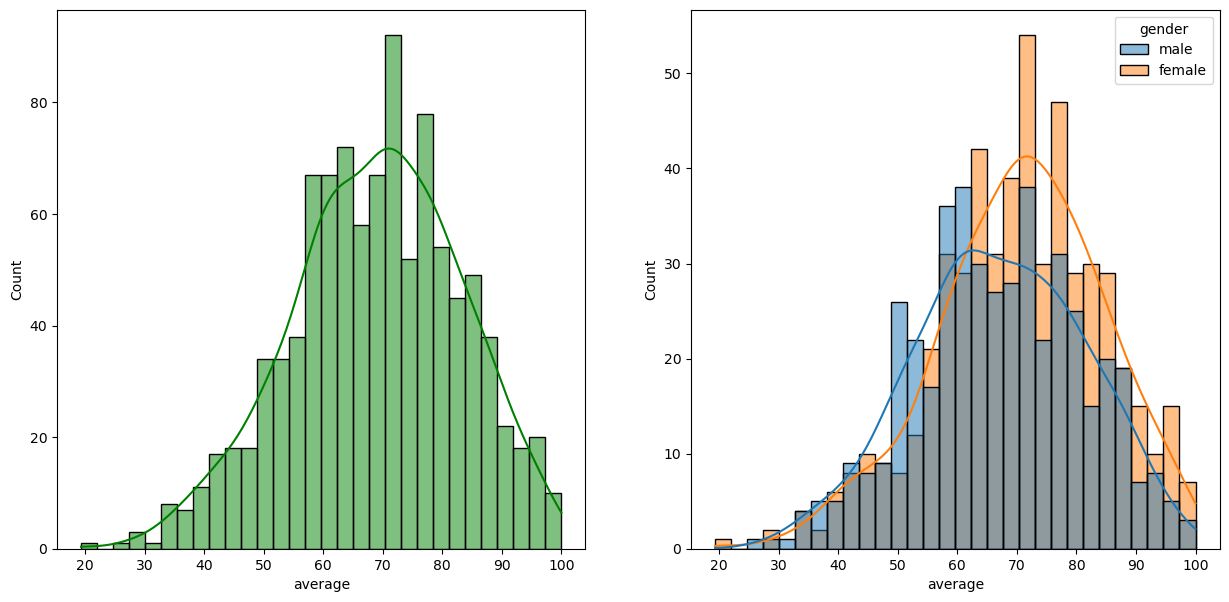

In [20]:
## Explore more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")
plt.show()

## Insights
- Female student tend to perform well than male students

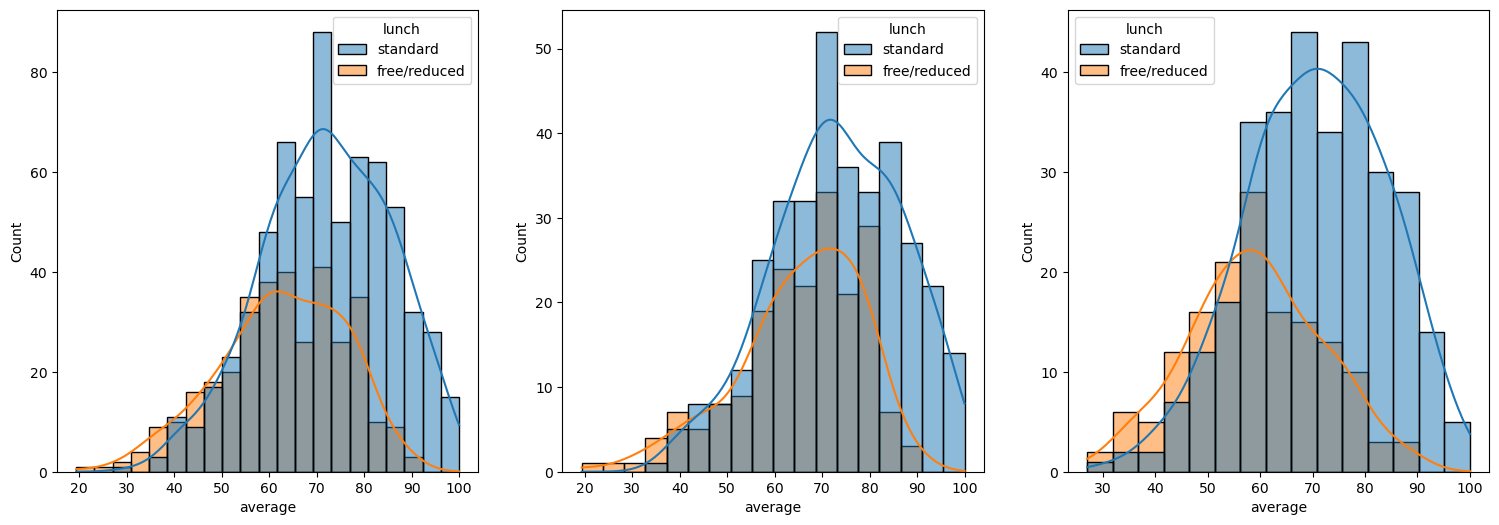

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="lunch")
plt.show()

## Insights
- Standard lunchs helps students perform well in exams
- Standard lunchs helps students, male and female both well in the exam 

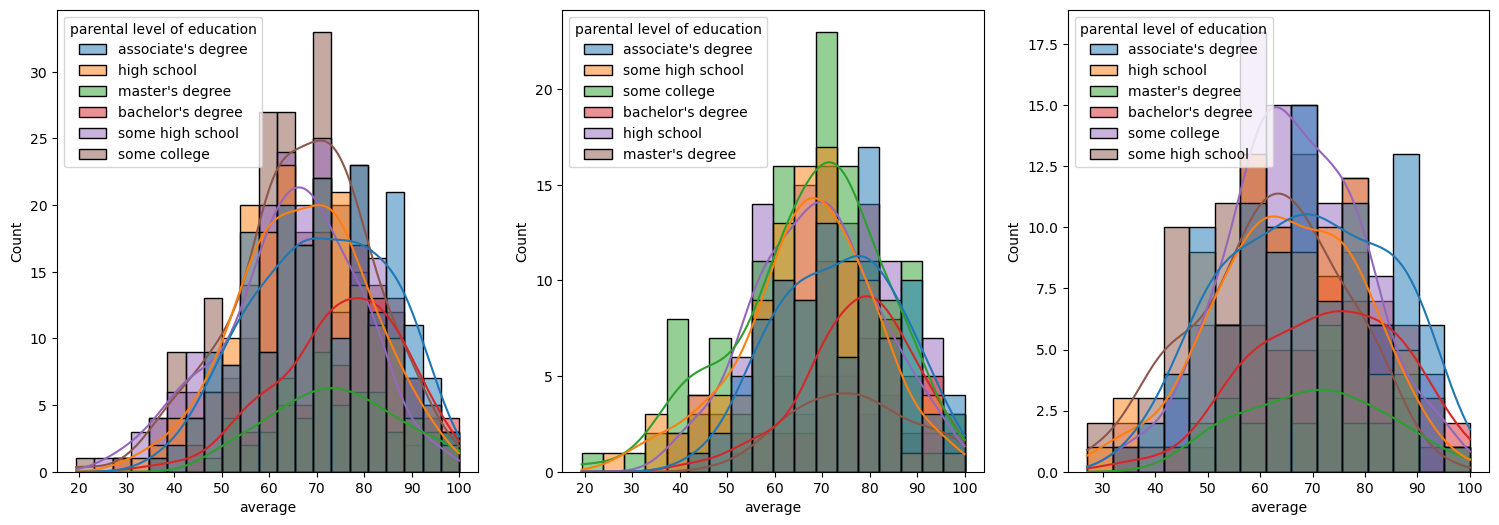

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="parental level of education")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="parental level of education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="parental level of education")
plt.show()

## Insights
- In general parental education don't help student perform well in exam
- 2nd plot we can see there is no effect of parent's education on female student
- 3rd plot shows that parent's whose education is of associated degree or master's degree their male child tend to perform well in exams

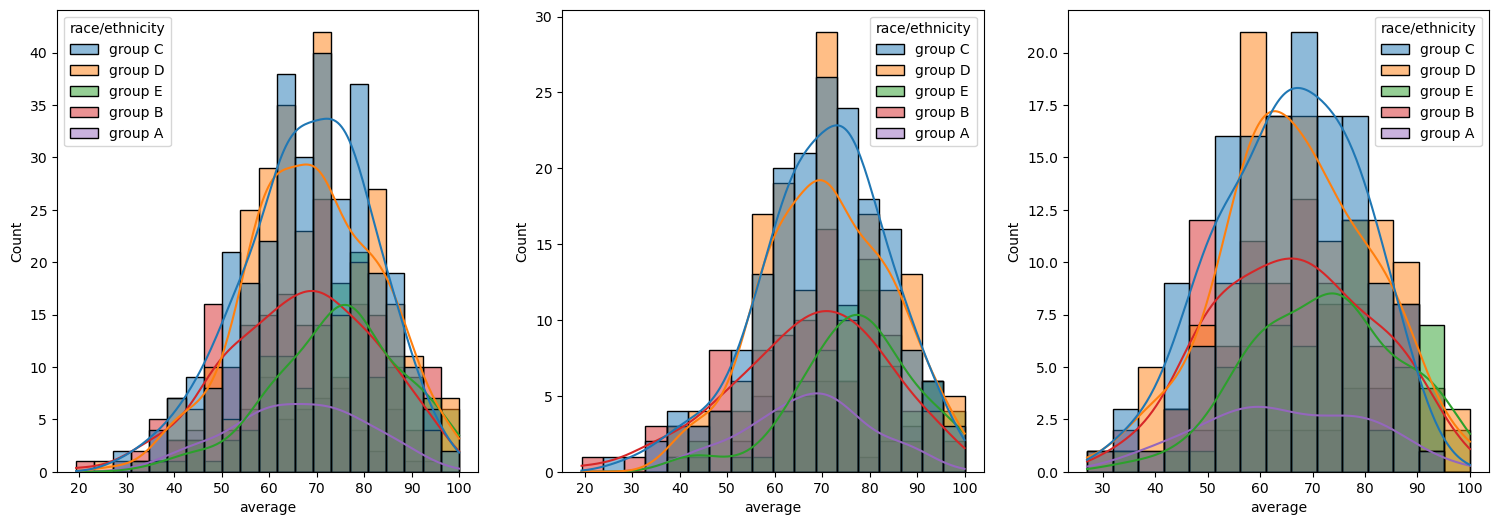

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="race/ethnicity")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="race/ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="race/ethnicity")
plt.show()

## Insights
- Students of group A and B are tend to perform poorly in exams
- Students of group A and B are tend to perform poorly in exams irrespective of whether they are male of female

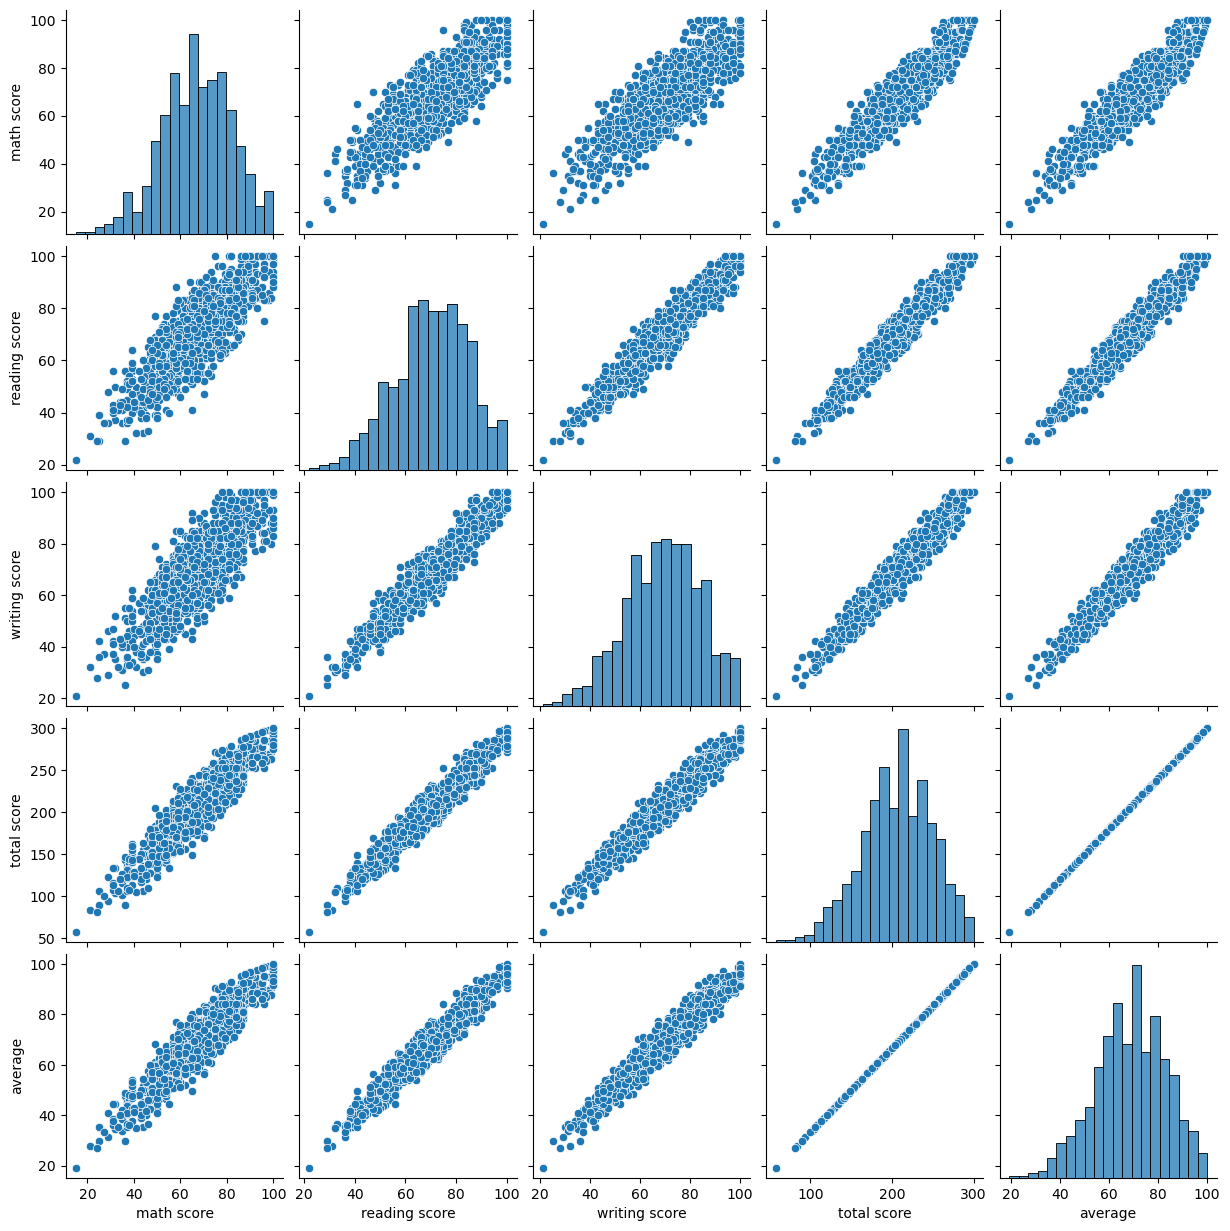

In [28]:
sns.pairplot(df)

<AxesSubplot:>

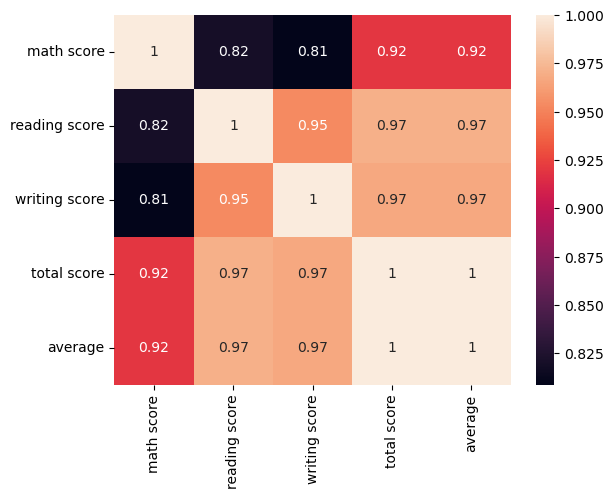

In [29]:
sns.heatmap(df.corr(),annot=True)